In [1]:
# Importing the required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the iris dataset
data= pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Pre-processing of Data

In [4]:
# Normalising all features to a uniform scale
scaler=MinMaxScaler()
data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]=scaler.fit_transform(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,0.428704,0.439167,0.467571,0.457778
std,43.445368,0.230018,0.180664,0.299054,0.317984
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.250000,0.222222,0.333333,0.101695,0.083333
50%,75.500000,0.416667,0.416667,0.567797,0.500000
75%,112.750000,0.583333,0.541667,0.694915,0.708333
max,150.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Dropping columns with categorical data
data2=data.drop(['Id','Species'],axis=1)
data2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## K-Means Clustering

In [7]:
# Finding the optimum number of clusters using the Elbow method
""" SSE is the cluster sum of squared errors """

from sklearn.cluster import KMeans
SSE=[]
k_range=range(1,11)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(data2)
    SSE.append(km.inertia_)    

In [8]:
# Displaying cluster sum of squared error values for each value of k
value=pd.DataFrame({'K':k_range, 'SSE': SSE})
value

,K,SSE
0,1,41.138172
1,2,12.143688
2,3,6.998114
3,4,5.532831
4,5,4.571924
5,6,3.915088
6,7,3.495006
7,8,3.129781
8,9,2.809629
9,10,2.532872


(0, 10)

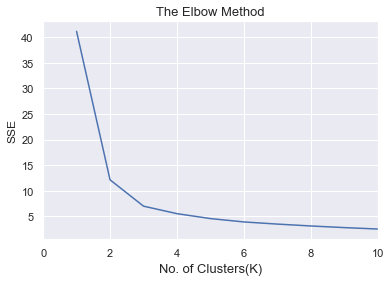

In [9]:
# Plotting the above as a line plot to visualize the 'elbow'
sns.set()
sns.lineplot(x=k_range,y=SSE)
plt.xlabel('No. of Clusters(K)',fontsize=13)
plt.ylabel('SSE',fontsize=12)
plt.title('The Elbow Method',fontsize=13)
plt.xlim([0,10])

The optimum number of clusters (K) is where the 'elbow' occurs. This is when K=3 and the cluster sum of squares (SSE) doesn't significantly decrease with every iteration.

In [10]:
# Creating the KMeans Classifier
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(data2)

# Clustering the data into respective groups
data2['Cluster']=y_kmeans
data2.Cluster.value_counts()

2    61
1    50
0    39
Name: Cluster, dtype: int64

In [11]:
# Obtaining the Centroids
y=[]
x=[]
for i in kmeans.cluster_centers_:
    x.append(i[0])
for k in kmeans.cluster_centers_:
    y.append(k[1])
centroid=pd.DataFrame({'x':x, 'y': y})
centroid

,x,y
0,0.707265,0.450855
1,0.196111,0.590833
2,0.441257,0.307377


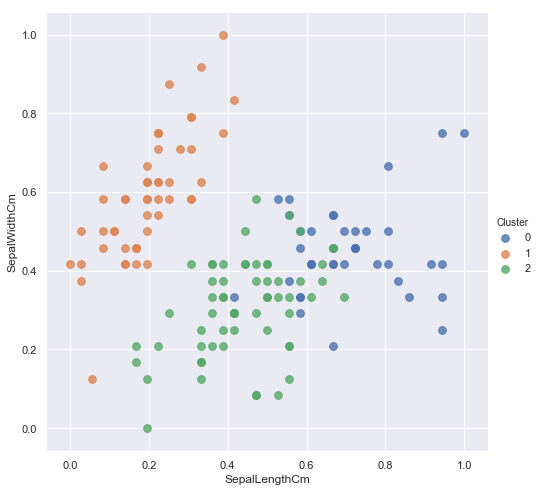

In [12]:
# Visualizing the clusters
sns.lmplot(data=data2, x='SepalLengthCm', y='SepalWidthCm',hue='Cluster',fit_reg=False,scatter_kws={"s": 60},height=7)

In [13]:
# Comparing with original data
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Thus, our K-Means Classifier successfully grouped the iris dataset into three clusters without knowing the above species classification.

Text(0, 0.5, 'SepalWidthCm')

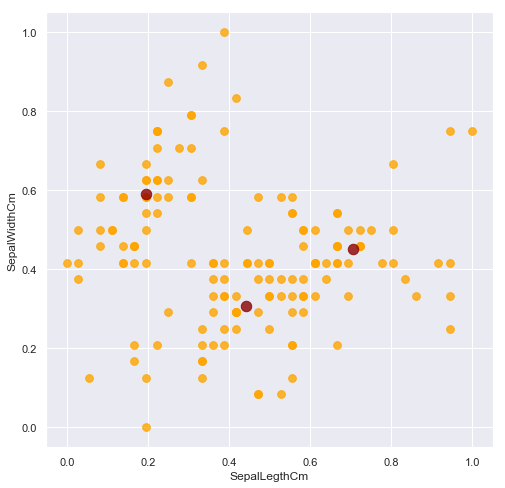

In [14]:
# Visualizing the centroids
fig,ax=plt.subplots(sharex=True,sharey=True)
fig.set_size_inches(8, 8)
sns.regplot(data=data2, x='SepalLengthCm', y='SepalWidthCm',fit_reg=False,scatter_kws={"s": 60,"color":"orange"})
sns.regplot(data=centroid, x='x', y='y',fit_reg=False,scatter_kws={"s": 110,"color":"darkred"})
plt.xlabel('SepalLegthCm')
plt.ylabel('SepalWidthCm')